# Training the MNIST Dataset with MLP on Keras
* Google search: keras mnist example with mlp
  * [How to create an MLP classifier with TensorFlow 2.0 and Keras](https://www.machinecurve.com/index.php/2019/07/27/how-to-create-a-basic-mlp-classifier-with-the-keras-sequential-api/)

* The following Keras code is similar to the above reference, but not equal.
* Read the reference to understand the details.

## Data acquisition

In [58]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Data exploration

In [59]:
print(type(x_train), type(y_train), type(x_test), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [60]:
print( x_train.shape, y_train.shape, x_test.shape, y_test.shape )

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


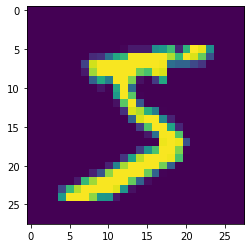

In [61]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [62]:
y_train.shape, y_train, 

((60000,), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

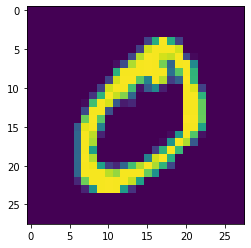

In [63]:
plt.imshow(x_train[1])
plt.show()

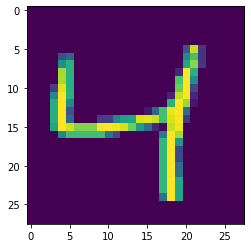

In [64]:
plt.imshow(x_train[2])
plt.show()

## Data Preparation

In [65]:
# pixel value ranges from 0 to 255. (256)
# scaling the max value to 1
x_train_normalized = x_train.astype('float32') / 255
x_test_normalized = x_test.astype('float32') / 255

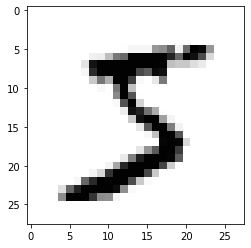

In [66]:
plt.imshow(x_train_normalized[0], cmap='Greys')

In [67]:
import numpy as np

# Make sure the shape
x_train_normalized = np.expand_dims( x_train_normalized, -1 )
x_test_normalized = np.expand_dims( x_test_normalized, -1 )
print( x_train_normalized.shape[0], x_test_normalized.shape[0] )

60000 10000


In [68]:
# Reshape the data
#   by flattening the 2D (28x28) to 1D (784)
# input_shape = (28, 28, 1)
input_shape = (784, )

x_train_prepared = x_train.reshape(x_train_normalized.shape[0], input_shape[0])
x_test_prepared = x_test.reshape(x_test_normalized.shape[0], input_shape[0])

In [70]:
x_train_normalized.shape[0], input_shape[0]

(60000, 784)

In [71]:
# One-hot encoding
number_of_classes = 10  # because 0-9

y_train_prepared = keras.utils.to_categorical(y_train, number_of_classes)
y_test_prepared = keras.utils.to_categorical(y_test, number_of_classes)

In [72]:
y_train_prepared[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [73]:
y_train_prepared[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [74]:
y_train_prepared[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [75]:
y_test.shape, y_test

((10000,), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [76]:
y_test_prepared[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [77]:
y_test_prepared[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Feature Engineering
is skipped

## Model Selection
MLP with
* input layer of 350 neurons
* hidden layer of 50 neurons
* output layer of 10 neurons

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

model = keras.Sequential(
    [Dense(350, input_shape=input_shape, activation='relu'),
     Dense(50, activation='relu'),
     Dense(number_of_classes, activation='softmax'),
    ]
)

## Model Training & Hyper-parameter Tuning
Configure the hyper-parameters.

Recall
```text
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
```

In [81]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
model.fit(x_train_prepared, y_train_prepared, epochs=20, batch_size=250, validation_split=0.2)

# ValueError: Shapes (250, 10) and (250, 28, 28, 10) are incompatible
# ValueError: Shapes (32, 10) and (32, 28, 28, 10) are incompatible
# -> input_shape = (28, 28, 1) => input_shape = (784, )
# ValueError: Input 0 of layer sequential_1 is incompatible with the layer: 
#              expected axis -1 of input shape to have value 784 but received input with shape (32, 28, 28, 1)
# -> x_train = x_train.reshape(x_train.shape[0], input_shape[0])
# -> x_test = x_test.reshape(x_test.shape[0], input_shape[0])

Epoch 1/20
192/192 [==============================] - 2s 11ms/step - loss: 0.0304 - accuracy: 0.9907 - val_loss: 0.1791 - val_accuracy: 0.9690
Epoch 2/20
192/192 [==============================] - 2s 11ms/step - loss: 0.0365 - accuracy: 0.9896 - val_loss: 0.1869 - val_accuracy: 0.9679
Epoch 3/20
192/192 [==============================] - 2s 11ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.1927 - val_accuracy: 0.9680
Epoch 4/20
192/192 [==============================] - 2s 11ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.1956 - val_accuracy: 0.9697
Epoch 5/20
192/192 [==============================] - 2s 11ms/step - loss: 0.0260 - accuracy: 0.9920 - val_loss: 0.2032 - val_accuracy: 0.9694
Epoch 6/20
192/192 [==============================] - 2s 11ms/step - loss: 0.0323 - accuracy: 0.9905 - val_loss: 0.1987 - val_accuracy: 0.9677
Epoch 7/20
192/192 [==============================] - 2s 11ms/step - loss: 0.0302 - accuracy: 0.9912 - val_loss: 0.1861 - val_accuracy: 0.9694

## Predictions

In [85]:
predictions = model.evaluate(x_test_prepared, y_test_prepared)

313/313 [==============================] - 1s 2ms/step - loss: 0.1408 - accuracy: 0.9716


MLP can achieve the accuracy of 0.9803

In [86]:
print(f'Test results: Loss = {predictions[0]}, Accuracy = {predictions[1]}')

Test results: Loss = 0.14081749320030212, Accuracy = 0.9715999960899353
